In [12]:
#importing the libraries
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import nltk
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, GlobalMaxPooling1D, Flatten
#from keras.layers.embeddings import Embedding
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [13]:
%%writefile content.json
{"intents": [
        {
        "tag": "greeting",
            "input": 
                [
                    "hello", 
                    "hi there", 
                    "nice to meet you", 
                    "hi, is this is the pirate's organization", 
                    "any pirates here?", 
                    "hi", 
                    "hey there", 
                    "hey"
                ],
            "responses": 
                [
                    "Hi. Welcome to the world's largest pirate organization - The Strawhats", 
                    "Hey yo, do you need help ?", 
                    "welcome aboard, how may I help you ?", 
                    "ahoy!!", 
                    "Hi random person, what do'ya want ?", 
                    "Hello my friend, How can I help you?",
                    "Ha, Glad you showed up. How are you ?"
                ]
        },
        {"tag": "goodbye",
            "input": 
                 [
                    "Thank you", 
                    "Thanks", 
                    "Thanks for the info", 
                    "bye",
                    "bye bro", 
                    "adios", 
                    "okay bye", 
                    "goodbye", 
                    "see you later", 
                    "i will catch you later"
                ],
            "responses": 
                 [
                    "Okay, Bye", 
                    "Have a nice day", 
                    "Adios", 
                    "Goodbye", 
                    "see you later", 
                    "nice conversation. bye", 
                    "okay. Have a nice day"
                ]
        },
        {"tag": "howami",
            "input": 
                 [
                    "how are you ?", 
                     "I am fine"
                 ],
            "responses": 
                 [
                     "Yeah, am fine", "Everything's going on well", 
                     "Doing good. Thanks you are my best friend", 
                     "Things are Great", 
                     "Yeah Fine, nothing much going on in my life", 
                     "I am Great , wanna join the pirate's organization?", 
                     "Everything's great.", 
                     "I am doing good. Life is boring. need to go on an adventure", 
                     "how are you ?", 
                     "are you fine?", 
                     "how are things going on ?", 
                     "everything going on okay?", 
                     "how's everything going?"
                ]
        },
        {"tag": "whoareyou",
             "input":
                 [
                     "who are you ?", 
                     "what are you :",
                     "what is your name ", 
                     "are you a chatbot ?", 
                     "what can I call you ?", 
                     "your name", 
                     "are you a bot p"
                 ],
             "responses": 
                 [
                     "I am a The Great Pirate Bot ,you can call me Going Merry",
                     "I am Going Merry and you could ask me questions about our organization", 
                     "Going Merry at your service", 
                     "My name is Going Merry and yes, I am the G.O.A.T", 
                     "You can call me TechBot and I am here to Help you", 
                     "My name is Going Merry and I am here to answer your questions regarding our organization. go ahead and shoot"
                 ]
        },
        {"tag": "whereareyou",
             "input":
                 [
                     "where are you from ?", 
                     "which country are you from ?", 
                     "where do you live ?", 
                     "where are you ?", 
                     "where do you live in?"
                 ],
             "responses": 
                [
                     "I Live in the East Blue", 
                     "I am setting sail to the grand line",
                     "I live in East Blue. Pretty sure you wouldn't have heard about that", 
                     "East Blue. That's where I live"
                ]
        },
        {
        "tag": "join",
            "input": 
                [
                    "how to get recruited ?", 
                    "how to join ?", 
                    "how do i get recruited ?", 
                    "How to join the strawhats ?", 
                    "how do I join the straw hats ?"
                ],
            "responses": 
                [
                    "you need to contact the nearest straw hats center once you have completed the pre-requisites",
                    "contact the closest straw hat center from your location", 
                    "well. there are some pre-requisite and after you complete them, find the straw hat centers"
                ]
        },
        {
        "tag": "whereisthecenter",
            "input": 
                [
                    "where is the straw hat center located ?", 
                    "location of the straw hat center ?", 
                    "strawhat center's location?"
                ],
            "responses": 
                [
                    "That's up to you. use your skills", 
                    "They are present all over the city you live in. Find them on your own. I can't give any more information", 
                    "there are a lot of straw hat centers in the city you are in. find them"
                ]
        },
        {
        "tag": "prerequisites",
            "input": 
                [
                    "what are the job requirements ?", 
                    "what are the pre requisites ?", 
                    "what are the pre-requisites ?", 
                    "tell me about the pre-requisites"
                ],
            "responses": 
                [
                    "you gotta master the art of swordfight or master Cooking and become a furious cook or you have to be the best navigator in the entire wor.ld, a swordsman, a medical reindeer, taekwando Cook, master navigator, simple minded monkey, highly intelligent strategist"
                ]
        }
   ]
}

Overwriting content.json


In [14]:
#importing the dataset
with open('content.json') as content:
    data1 = json.load(content)

In [15]:
#getting all the data to lists
tags = []
inputs = []
responses={}
for intent in data1['intents']:
    responses[intent['tag']]=intent['responses']
    for lines in intent['input']:
        inputs.append(lines)
        tags.append(intent['tag'])

In [16]:
#converting to dataframe
data = pd.DataFrame({"inputs": inputs,
                      "tags":tags})

In [17]:
#printing the data
data

,inputs,tags
0,hello,greeting
1,hi there,greeting
2,nice to meet you,greeting
3,"hi, is this is the pirate's organization",greeting
4,any pirates here?,greeting
5,hi,greeting
6,hey there,greeting
7,hey,greeting
8,Thank you,goodbye
9,Thanks,goodbye


In [18]:
#removing puntuations
import string
data['inputs'] = data['inputs'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['inputs'] = data['inputs'].apply(lambda wrd: ''.join(wrd))
data

,inputs,tags
0,hello,greeting
1,hi there,greeting
2,nice to meet you,greeting
3,hi is this is the pirates organization,greeting
4,any pirates here,greeting
5,hi,greeting
6,hey there,greeting
7,hey,greeting
8,thank you,goodbye
9,thanks,goodbye


In [19]:
#tokenize the data
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['inputs'])
train = tokenizer.texts_to_sequences(data['inputs'])
#apply padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(train)

#encoding the outputs
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])

In [20]:
input_shape = x_train.shape[1]
print(input_shape)

7


In [21]:
#define vocabulary
vocabulary = len(tokenizer.word_index)
print("number of unique words: ",vocabulary)
output_length = le.classes_.shape[0]
print("output length: ",output_length)

number of unique words:  71
output length:  8


In [22]:
#creating the model
i = Input(shape=(input_shape,))
x = Embedding(vocabulary+1,10)(i)
x = LSTM(10,return_sequences=True)(x)
x = Flatten()(x)
x = Dense(output_length,activation="softmax")(x)
model = Model(i,x)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [23]:
#compiling the model
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [24]:
#training the model
train = model.fit(x_train,y_train,epochs=200)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/200
44/44 [==============================] - 0s 10ms/sample - loss: 2.0841 - acc: 0.0455
Epoch 2/200
44/44 [==============================] - 0s 431us/sample - loss: 2.0800 - acc: 0.0682
Epoch 3/200
44/44 [==============================] - 0s 499us/sample - loss: 2.0762 - acc: 0.1818
Epoch 4/200
44/44 [==============================] - 0s 499us/sample - loss: 2.0722 - acc: 0.2500
Epoch 5/200
44/44 [==============================] - 0s 383us/sample - loss: 2.0687 - acc: 0.2500
Epoch 6/200
44/44 [==============================] - 0s 373us/sample - loss: 2.0648 - acc: 0.2500
Epoch 7/200
44/44 [==============================] - 0s 363us/sample - loss: 2.0611 - acc: 0.2500
Epoch 8/200
44/44 [==============================] - 0s 340us/sample - loss: 2.0573 - acc: 0.2955
Epoch 9/200
44/44 [==============================] - 0s 362us/sample - loss: 2.0536 - acc: 0.2727
Epoch 10/200
44/44 [=====

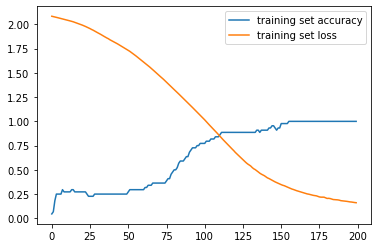

In [25]:
#plotting model accuracy
plt.plot(train.history['acc'],label='training set accuracy')
plt.plot(train.history['loss'],label='training set loss')
plt.legend()

In [26]:
#chatting
import random
import string

while True:
    texts_p = []
    prediction_input = input('You: ')
    #removing punctuation and converting to lowercase
    prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
    prediction_input = ''.join(prediction_input)
    texts_p.append(prediction_input)
    
    #tokenizing and padding
    prediction_input = tokenizer.texts_to_sequences(texts_p)
    prediction_input = np.array(prediction_input).reshape(-1)
    prediction_input = pad_sequences([prediction_input],input_shape)

    #getting output from model
    output = model.predict(prediction_input)
    output = output.argmax()

    #finding the right tag and predicting
    response_tag = le.inverse_transform([output])[0]
    print("Going Merry: ",random.choice(responses[response_tag]))
    if response_tag == "goodbye":
        break

You: hi
Going Merry:  ahoy!!
You: what is your name?
Going Merry:  My name is Going Merry and yes, I am the G.O.A.T
You: how do I join ?
Going Merry:  you need to contact the nearest straw hats center once you have completed the pre-requisites
You: strawhats center location?
Going Merry:  Things are Great
You: straw hats center location
Going Merry:  well. there are some pre-requisite and after you complete them, find the straw hat centers
You: strawhat centers location	
Going Merry:  They are present all over the city you live in. Find them on your own. I can't give any more information
You: what are the prerequisites	
Going Merry:  you gotta master the art of swordfight or master Cooking and become a furious cook or you have to be the best navigator in the entire wor.ld, a swordsman, a medical reindeer, taekwando Cook, master navigator, simple minded monkey, highly intelligent strategist
You: where do you live	whereareyou 30	where are you	whereareyou 31	where do you live in	wherearey